In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np
from regression import fit_nb_with_estimated_alpha, estimate_alpha, fit_nb, standardize_var, fit_nb_with_estimated_alpha_all_codes

In [ ]:
df_filtered = pd.read_csv('events/df_filtered_reg.csv').drop_duplicates()
df_filtered.head()

In [4]:
df_train = df_filtered[(df_filtered.year>2015) & (df_filtered.year<2020)]
df_train.describe()

,views_7_sum,views_before_mean,views_before_sum,views_before_max,views_before_min,views_before_median,views_before_increase,diff_days,year,edits_7_sum,...,pop_z,views_baseline_z,view_country_article_z,bing_hits_z,view_country_article_log,views_baseline_log,bing_hits_log,GDP_pc_log,GDP_log,population_log
count,1.127200e+04,11272.000000,1.127200e+04,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,...,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000
mean,2.408945e+04,677.779193,4.664065e+03,1260.804737,395.806068,582.275994,637.452094,-157.001686,2017.398510,35.425035,...,0.025132,-0.035331,-0.053675,-0.008431,8.830691,16.552558,6.916916,9.968763,27.830080,17.860074
std,1.166387e+05,4010.052603,2.804818e+04,7299.446987,2632.978186,3478.373468,4215.581662,377.532040,1.124252,115.530981,...,1.049830,0.960908,0.950960,0.941442,1.193482,3.260842,4.023689,1.109542,1.981183,1.675883
min,1.100000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-35168.000000,-5694.000000,2016.000000,0.000000,...,-0.580010,-0.443069,-0.932146,-0.254273,1.386294,0.000000,0.000000,4.676027,17.665728,9.256747
25%,3.787500e+02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-145.250000,2016.000000,1.000000,...,-0.491238,-0.441653,-0.696551,-0.254185,8.107645,14.181715,3.295837,9.097996,26.708063,17.001487
50%,1.967500e+03,25.714286,9.600000e+01,42.000000,10.000000,20.000000,0.000000,-16.000000,2017.000000,8.000000,...,-0.337532,-0.418491,-0.383367,-0.243059,8.952541,17.035286,8.103493,10.409898,28.174453,18.006057
75%,1.041075e+04,193.446429,1.205000e+03,383.000000,87.000000,149.000000,205.000000,0.000000,2018.000000,27.000000,...,0.176821,-0.276535,0.133011,-0.158585,9.615472,18.948647,10.247113,10.775794,28.696005,19.144178
max,5.580333e+06,188749.000000,1.321243e+06,351786.000000,134559.000000,150619.000000,208963.000000,1716.000000,2019.000000,3887.000000,...,4.588088,2.925758,2.631236,26.653740,10.822873,21.955765,15.886164,12.152185,30.693130,21.065255


In [5]:
df_test = df_filtered[(df_filtered.year>2019)]
df_test.describe()

,views_7_sum,views_before_mean,views_before_sum,views_before_max,views_before_min,views_before_median,views_before_increase,diff_days,year,edits_7_sum,...,pop_z,views_baseline_z,view_country_article_z,bing_hits_z,view_country_article_log,views_baseline_log,bing_hits_log,GDP_pc_log,GDP_log,population_log
count,1.686000e+03,1686.000000,1.686000e+03,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.0,1686.000000,...,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,3.596170e+04,805.672817,5.554514e+03,1528.899763,503.221827,675.442467,837.450178,-263.115065,2020.0,34.916370,...,0.024313,0.469937,0.426622,0.064411,9.115480,17.327239,7.033155,10.194629,28.149036,17.951146
std,2.511823e+05,5457.249831,3.818961e+04,12049.209220,3727.321259,4200.370970,8359.899673,492.789939,0.0,114.150167,...,0.790292,1.390787,1.380850,1.243918,1.429428,3.809742,4.012152,1.177008,2.377790,1.734169
min,1.100000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-10771.000000,-5478.000000,2020.0,0.000000,...,-0.579982,-0.443068,-0.932074,-0.254273,1.609438,6.908755,0.000000,4.777937,19.013531,9.803280
25%,5.515000e+02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-288.750000,2020.0,0.000000,...,-0.509244,-0.441215,-0.673832,-0.254205,8.199602,14.450718,3.044522,9.874465,26.794600,16.774896
50%,2.802000e+03,54.142857,3.125000e+02,96.000000,22.000000,41.000000,19.000000,-61.000000,2020.0,7.000000,...,-0.332639,-0.400446,-0.230106,-0.242770,9.198723,17.585828,8.128880,10.614456,28.266915,18.026031
75%,1.252950e+04,328.357143,2.198750e+03,640.500000,175.000000,287.750000,286.000000,-1.000000,2020.0,29.000000,...,0.629559,2.638912,2.417082,-0.134833,10.760898,21.866772,10.468830,11.052850,30.670471,19.613039
max,7.847440e+06,186775.857143,1.307431e+06,443489.000000,126206.000000,134859.000000,316295.000000,222.000000,2020.0,2084.000000,...,4.599778,2.952666,3.047678,22.446182,10.933393,21.963720,15.716125,12.101979,30.670471,21.067514


In [6]:
nb_fit_dict = fit_nb_with_estimated_alpha_all_codes(
                ['en', 'es', 'de', 'it'], df_train, 
                'views_7_sum ~ C(cat, Treatment(reference="sports")) + GDP_pc_log + views_baseline_log', 
                est_method='lbfgs', output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Estimated alpha as 13.17 (p=0.0009)
Deviance: 1728.25 | Null-deviance: 1815.43 | Pseudo R² (1 - D/D_0) = 0.0480
Pseudo ChiSq: 6922.93 | Good-Fit-ChiSq: 5910.26 | Residual DF: 5733
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.21
________________________________________________________________________________________________
================= Fitting es =================
Estimated alpha as 19.39 (p=0.0089)
Deviance: 504.44 | Null-deviance: 532.58 | Pseudo R² (1 - D/D_0) = 0.0528
Pseudo ChiSq: 3163.62 | Good-Fit-ChiSq: 2577.52 | Residual DF: 2461
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.29
________________________________________________________________________________________________
================= Fitting de =================
Estimated alpha as 5.72 (p=0.2161)
Deviance: 1129.81 |

16544.363189129


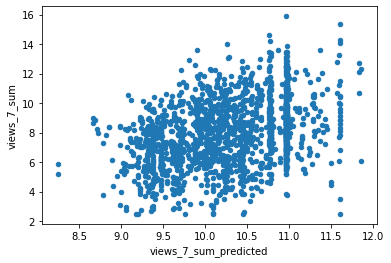

In [7]:
nb_predict_dict = {}
for code, nb_fit in nb_fit_dict.items():
    nb_predict_dict[code] = nb_fit.predict(df_test, linear=True)
df_predict = pd.concat([np.log1p(df_test.views_7_sum), nb_predict_dict['en'].rename('views_7_sum_predicted')], axis=1)
df_predict['diff_pred'] = df_predict.views_7_sum - df_predict.views_7_sum_predicted
mse_predicted = np.sum(df_predict.diff_pred * df_predict.diff_pred)
print(mse_predicted)
df_predict.plot(x='views_7_sum_predicted', y='views_7_sum', kind='scatter')

In [11]:
nb_fit_dict2 = fit_nb_with_estimated_alpha_all_codes(
                ['en', 'es', 'de', 'it'], df_train, 
                'views_7_sum ~ C(cat, Treatment(reference="sports")) + GDP_pc_log + views_baseline_log + population_log + view_country_article_z + gni_region + bing_hits_log', 
                est_method='lbfgs', output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Estimated alpha as 11.81 (p=0.0007)
Deviance: 1854.12 | Null-deviance: 2023.45 | Pseudo R² (1 - D/D_0) = 0.0837
Pseudo ChiSq: 6793.59 | Good-Fit-ChiSq: 5901.12 | Residual DF: 5724
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.19
________________________________________________________________________________________________
================= Fitting es =================
Estimated alpha as 12.94 (p=0.0000)
Deviance: 671.84 | Null-deviance: 797.84 | Pseudo R² (1 - D/D_0) = 0.1579
Pseudo ChiSq: 2829.26 | Good-Fit-ChiSq: 2568.31 | Residual DF: 2452
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.15
________________________________________________________________________________________________
================= Fitting de =================
Estimated alpha as 4.06 (p=0.0006)
Deviance: 1262.28 |

16377.153903107532
red culture
blue disaster
orange politics
black sports


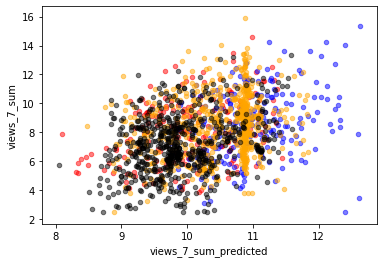

In [12]:
nb_predict_dict2 = {}
for code, nb_fit in nb_fit_dict2.items():
    nb_predict_dict2[code] = nb_fit.predict(df_test, linear=True)
    
df_predict2 = pd.concat([df_test.pagetitle, df_test.cat, np.log1p(df_test.views_7_sum), nb_predict_dict2['en'].rename('views_7_sum_predicted')], axis=1)
df_predict2['diff_sqr_pred'] = np.square(df_predict2.views_7_sum - df_predict2.views_7_sum_predicted)
mse_predicted2 = df_predict2['diff_sqr_pred'].sum()

colors = ['red', 'blue', 'orange', 'black']
print(mse_predicted2)
ax=None
for i, (cat, df) in enumerate(df_predict2.groupby('cat')):
    ax = df.plot(x='views_7_sum_predicted', y='views_7_sum', kind='scatter', color=colors[i], ax=ax, alpha=0.5)
    print(colors[i], cat)

In [ ]:
df_predict2.loc[df_predict2['diff_sqr_pred'].nlargest(20).index]

In [132]:
nb_fit.get_prediction(df_test, linear=True).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,88305.048273,53612.645522,26865.536901,290252.213423
1,13900.318281,17748.737871,1138.048896,169780.796807
2,65807.669197,46971.205571,16244.962376,266584.140052
3,31452.206319,20746.369870,8633.466197,114582.168939
4,28674.213944,38347.534675,2085.138568,394319.379105
...,...,...,...,...
1681,18422.545117,9790.544783,6501.056885,52205.383613
1682,18705.779401,9963.812669,6585.293696,53134.484075
1683,33115.979393,15275.382754,13409.250747,81784.442086
1684,13031.267293,4489.226835,6633.620831,25598.980041


In [125]:
def r_squared(y, y_hat):
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)


In [129]:
df_predict[['views_7_sum', 'views_7_sum_predicted']].corr('spearman')

,views_7_sum,views_7_sum_predicted
views_7_sum,1.000000,0.353458
views_7_sum_predicted,0.353458,1.000000


In [128]:
df_predict2[['views_7_sum', 'views_7_sum_predicted']].corr('spearman')

,views_7_sum,views_7_sum_predicted
views_7_sum,1.000000,0.350396
views_7_sum_predicted,0.350396,1.000000


In [102]:
r_squared( df_predict2.views_7_sum_predicted, df_predict2.views_7_sum)

-14.708862251195065

# Full fit: Combine all into single model

In [15]:
nb_fit_full = fit_nb_with_estimated_alpha(df_train, 'views_7_sum ~ code * (C(cat, Treatment(reference="sports")) + GDP_pc_log + view_country_article_log +  C(gni_region, Treatment(reference="North America")) + population_log + bing_hits_log)', est_method='lbfgs', output_lvl=1)


Estimated alpha as 11.29 (p=0.0000)
Deviance: 3655.23 | Null-deviance: 4866.25 | Pseudo R² (1 - D/D_0) = 0.2489
Pseudo ChiSq: 14078.07 | Good-Fit-ChiSq: 11463.49 | Residual DF: 11216
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.26


In [31]:
nb_predict_full = nb_fit_full.predict(df_test, linear=True)
nb_predict_full

1        12.027139
2        11.580797
3        10.340900
4        11.088808
5        10.466873
           ...    
14777     9.529888
14778    10.386829
14779     9.457179
14795    10.500051
14797     9.546553
Length: 1686, dtype: float64

In [19]:
nb_predict_full_frame = nb_predict_full.summary_frame()

In [23]:
nb_predict_full_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,167232.340993,29605.279187,118203.778212,236596.970901
1,107022.792715,29085.469454,62826.975056,182308.286374
2,30973.894829,6827.539479,20107.887969,47711.731951
3,65434.711500,13885.477315,43169.817491,99182.755870
4,35132.204536,10699.351737,19340.864266,63816.785983
...,...,...,...,...
1681,13765.048883,4550.519184,7200.841722,26313.114229
1682,32429.684049,8709.807337,19157.160300,54897.719235
1683,12799.719153,3987.995593,6950.122093,23572.652136
1684,36317.367133,5123.496914,27544.223140,47884.855882


In [43]:
df_predict_full = pd.concat([df_test.pagetitle,df_test.code, df_test.cat, np.log1p(df_test.views_7_sum), nb_predict_full.rename('views_7_sum_predicted')], axis=1)
df_predict_full['diff_sqr_pred'] = np.square(df_predict2.views_7_sum - df_predict2.views_7_sum_predicted)
mse_predicted_full = df_predict_full['diff_sqr_pred'].sum()


In [35]:
df_predict2[['views_7_sum', 'views_7_sum_predicted']].corr('spearman')

,views_7_sum,views_7_sum_predicted
views_7_sum,1.000000,0.414961
views_7_sum_predicted,0.414961,1.000000


In [ ]:

colors = ['red', 'blue', 'orange', 'black']
marker = ['']
print(mse_predicted2)
ax=None
for i, (cat, df) in enumerate(df_predict2.groupby('cat')):
    ax = scatterplot(x=df.views_7_sum_predicted, y=df.views_7_sum, 
                     df.plot(x='views_7_sum_predicted', y='views_7_sum', kind='scatter', color=colors[i], ax=ax, alpha=0.5)
    print(colors[i], cat)

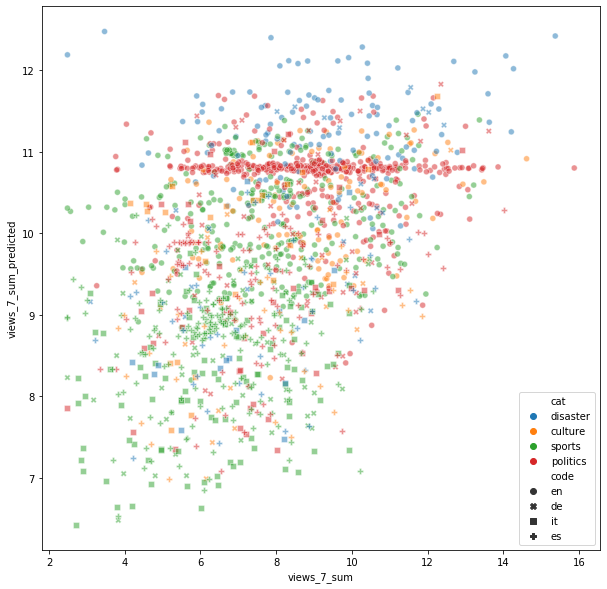

In [55]:
import seaborn as sns
from seaborn import scatterplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
scatterplot(x=df_predict_full.views_7_sum, y=df_predict_full.views_7_sum_predicted, hue=df_predict_full.cat, style=df_predict_full.code, alpha=0.5, ax=axs[0])

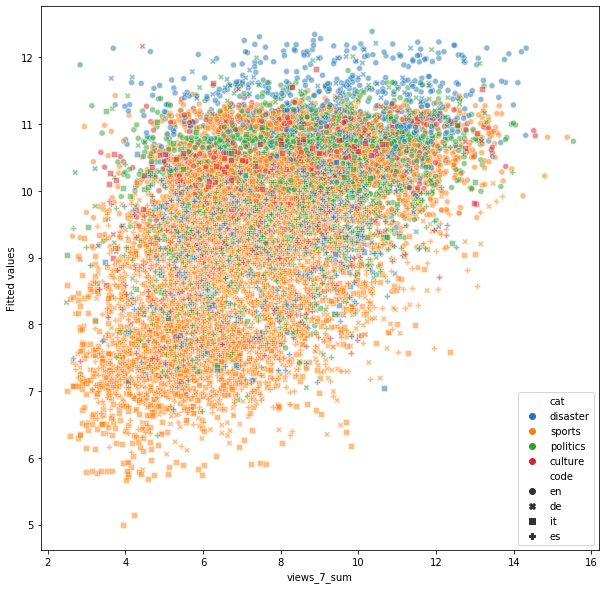

In [63]:
plt.figure(figsize=(10,10))
scatterplot(x=np.log1p(df_train.views_7_sum), y=np.log1p(nb_fit_full.fittedvalues.rename('Fitted values')), hue=df_train.cat, style=df_train.code, alpha=0.5)

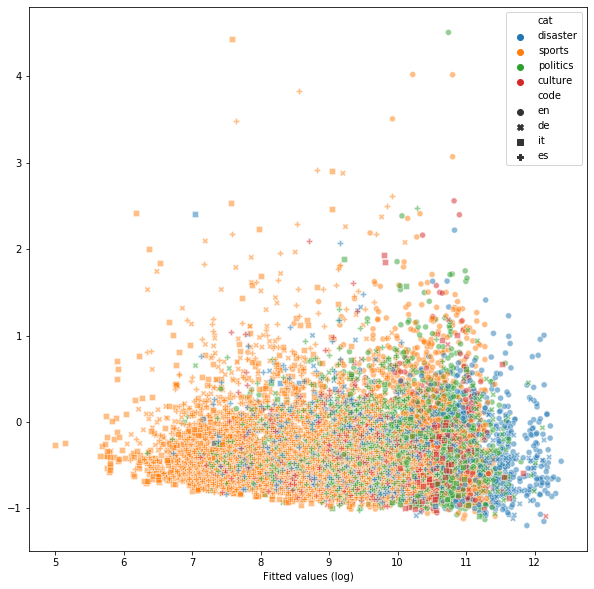

In [78]:
plt.figure(figsize=(10,10))
scatterplot(x=np.log1p(nb_fit_full.fittedvalues.rename('Fitted values (log)')), y=nb_fit_full.resid_deviance, hue=df_train.cat, style=df_train.code, alpha=0.5)

In [65]:
nb_fit_full.resid_pearson

0        1.119365
102     -0.275155
104      4.615415
106      2.046242
107      0.026763
           ...   
14791   -0.241450
14792    0.564234
14793   -0.293579
14799    0.168360
14800   -0.186297
Length: 11272, dtype: float64